In [1]:
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.externals import joblib

import matplotlib.pyplot as plt

/home/roy/bank-marketing/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
def cv_evaluator(model, x, y, folds):
    # Returns mean accuracy of n_folds cross validation
    mean_accuracy = cross_val_score(
        model, 
        x_train, 
        y_train, 
        cv=folds,
    ).mean()
    
    return mean_accuracy

In [4]:
df = pd.read_csv('../data/bank-additional-full.csv', delimiter = ';')
df['y_vals'] = df['y'].apply(lambda x: 1 if x=='yes' else 0)
df.drop(columns='duration', inplace=True)

In [6]:
df.columns = [ c.replace('.','_') for c in df.columns]

In [13]:
df['y_vals'].apply(lambda x: "Success" if x==1 else "Fail")

0           Fail
1           Fail
2           Fail
3           Fail
4           Fail
          ...   
41183    Success
41184       Fail
41185       Fail
41186    Success
41187       Fail
Name: y_vals, Length: 41188, dtype: object

In [16]:
for i in zip([1,2],[3,4],[5,6]): print(i)

(1, 3, 5)
(2, 4, 6)


In [181]:
categorical = ['job','marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

In [207]:
dfx = df.groupby('marital').apply(lambda x: pd.Series({
    'yes': x['y_vals'].sum(),
    'no': len(df['y_vals']) -x['y_vals'].sum()
}))

In [279]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx',
       'euribor3m', 'nr_employed', 'y', 'y_vals'],
      dtype='object')

In [182]:
y_vals = df['y'].apply(lambda x: 1 if x=='yes' else 0).values

In [267]:
y_vals.min()

0

In [266]:
response

[{'value': 'housemaid'},
 {'value': 'services'},
 {'value': 'services'},
 {'value': 'admin.'},
 {'value': 'services'},
 {'value': 'services'},
 {'value': 'admin.'},
 {'value': 'blue-collar'},
 {'value': 'technician'},
 {'value': 'services'},
 {'value': 'blue-collar'},
 {'value': 'services'},
 {'value': 'blue-collar'},
 {'value': 'housemaid'},
 {'value': 'blue-collar'},
 {'value': 'retired'},
 {'value': 'blue-collar'},
 {'value': 'blue-collar'},
 {'value': 'blue-collar'},
 {'value': 'management'},
 {'value': 'unemployed'},
 {'value': 'blue-collar'},
 {'value': 'retired'},
 {'value': 'technician'},
 {'value': 'admin.'},
 {'value': 'technician'},
 {'value': 'technician'},
 {'value': 'self-employed'},
 {'value': 'technician'},
 {'value': 'unknown'},
 {'value': 'admin.'},
 {'value': 'technician'},
 {'value': 'blue-collar'},
 {'value': 'management'},
 {'value': 'blue-collar'},
 {'value': 'unknown'},
 {'value': 'services'},
 {'value': 'technician'},
 {'value': 'admin.'},
 {'value': 'technicia

In [98]:
for cat in categorical:
    df = pd.concat([df, pd.get_dummies(df[cat], prefix=cat, drop_first=True)], axis=1) 

df.drop(columns=categorical, inplace=True)

In [99]:
cols = df.drop(columns=['y']).columns

In [166]:
x_train, x_test, y_train, y_test = train_test_split(
    df.drop(columns=['y']), 
    y_vals, 
    random_state=20191102
)
folds = KFold(n_splits=5, shuffle=True, random_state=20191102)

In [101]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [102]:
# Export Scaler
joblib.dump(scaler,  '../MLModels/scaler.joblib')

['../MLModels/scaler.joblib']

### Checking Out Continuous Variables

In [233]:
pd.cut(df['age'], 20).value_counts().sort_index().reset_index()

,index,age
0,"(16.919, 21.05]",242
1,"(21.05, 25.1]",1424
2,"(25.1, 29.15]",4003
3,"(29.15, 33.2]",7340
4,"(33.2, 37.25]",6759
5,"(37.25, 41.3]",5278
6,"(41.3, 45.35]",4311
7,"(45.35, 49.4]",3776
8,"(49.4, 53.45]",3141
9,"(53.45, 57.5]",2682


10.0
20.0
30.0
40.0
50.0
60.0
70.0
80.0
90.0
100.0
110.0


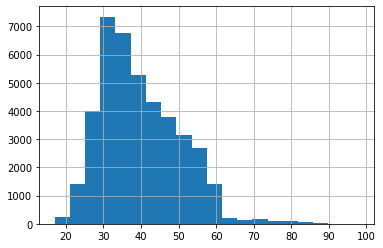

In [236]:
for i in df['age'].hist(bins=20).get_xticks(): print(i)

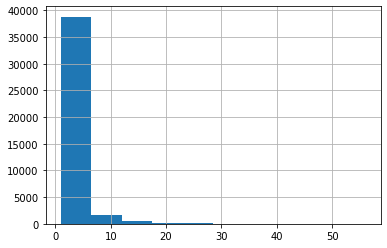

In [174]:
df['campaign'].hist()

In [176]:
df['previous'].value_counts()

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

In [173]:
df.columns

Index(['age', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_unknown',
       'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown',
       'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_success'

## Logistic Regression

In [126]:
log_model = LogisticRegression() 
log_model.fit(x_train, y_train)
prediction = log_model.predict(x_test)

In [127]:
joblib.dump(log_model, '../MLModels/logistic_regression.joblib')

['../MLModels/logistic_regression.joblib']

In [128]:
print(cv_evaluator(log_model, x_train, y_train, folds))

0.8979313594207472


In [129]:
print(confusion_matrix(y_test, prediction)/len(prediction)*100)

[[87.89938817  1.31106147]
 [ 8.3131009   2.47644945]]


## Random Forests

In [130]:
rf_model = RandomForestClassifier(n_estimators = 100)
rf_model.fit(x_train, y_train)
prediction = rf_model.predict(x_test)

In [131]:
joblib.dump(rf_model, '../MLModels/random_forests.joblib')

['../MLModels/random_forests.joblib']

In [132]:
print(cv_evaluator(rf_model, x_train, y_train, folds))

0.8904858722442073


In [133]:
print(confusion_matrix(y_test, prediction)/len(prediction)*100)

[[86.4426532   2.76779645]
 [ 7.64300282  3.14654754]]


#### Feature Importance using RF

In [134]:
feature_importance = sorted(
    zip(
        map(lambda x: round(x, 4), 
            rf_model.feature_importances_
           ), cols), 
             reverse=True
)

In [135]:
# Top 10 important features
for f in feature_importance[:10]: print(f)

(0.1737, 'age')
(0.1344, 'euribor3m')
(0.0864, 'campaign')
(0.0471, 'nr_employed')
(0.0395, 'housing_yes')
(0.031, 'pdays')
(0.0277, 'cons_conf_idx')
(0.0244, 'loan_yes')
(0.0236, 'poutcome_success')
(0.0236, 'cons_price_idx')


### XGBoost

In [136]:
xgb_model = XGBClassifier()
xgb_model.fit(x_train,y_train)
prediction = xgb_model.predict(x_test)

In [137]:
joblib.dump(xgb_model, '../MLModels/xgb.joblib')

['../MLModels/xgb.joblib']

In [107]:
print(cv_evaluator(model, x_train, y_train, folds))

0.8992586288492372


In [125]:
print(confusion_matrix(y_test, prediction)/len(prediction)*100)

[[87.89938817  1.31106147]
 [ 8.24511994  2.54443042]]
